# Linear Regression with 1-D input data
We consider the familiar case of linear regression with 1-D input data
and show how ML Uncertainty can be used to estimate prediction uncertainties.

In [3]:
#%%
import autograd.numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from ml_uncertainty.model_inference import ParametricModelInference
import matplotlib.pyplot as plt


def linear_model(X, beta):
    """ """
    return X @ beta


X_expt, _ = make_regression(n_samples=50, n_features=1, n_informative=1, random_state=1)
true_params = np.array([1.0])

# Means of X shifted by 5 to make sure that the analysis stays
# valid irrespective of the mean of X.
X_expt = X_expt + 5

y_expt = linear_model(X_expt, true_params) + np.random.normal(
    loc=0, scale=1, size=X_expt.shape[0]
)

# Fit model with sklearn.
regr = LinearRegression(fit_intercept=True)

regr.fit(X_expt, y_expt)


LinearRegression()

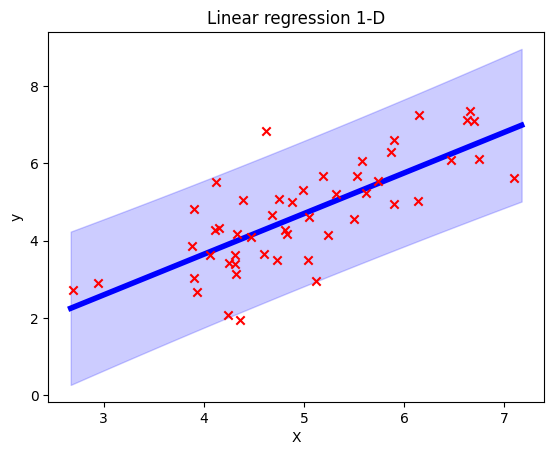

In [2]:
#%%
# Error estimation with ML uncertainty. 
inf = ParametricModelInference()

inf.set_up_model_inference(X_expt, y_expt, regr)

df_feature_imp = inf.get_parameter_errors()

# The range on which we want to get the prediction intervals.
X_new = np.linspace(X_expt[:, 0].min() * 0.99, X_expt[:, 0].max() * 1.01, 100).reshape(
    -1, 1
)

df_int = inf.get_intervals(X_new, confidence_level=95.0, distribution="t")

# Plot the experimental data along with predictions and prediction intervals.
plt.figure()
plt.xlabel(r"X")
plt.ylabel(r"y")
plt.title("Linear regression 1-D")

# Showing experimental points and predicted points.
plt.scatter(X_expt[:, 0], y_expt, marker="x", color="red", zorder=1, label="Data")

plt.plot(X_new[:, 0], df_int["mean"], lw=4, color="blue", zorder=0.5)

plt.fill_between(
    X_new[:, 0],
    df_int["lower_bound"].values,
    df_int["upper_bound"].values,
    color="blue",
    alpha=0.2,
    zorder=0,
)